# Exercise 3 - Binary Classification with Logistic Regression

This exercise is meant to familiarize you with the complete pipeline of solving a machine learning problem. You
need to obtain and pre-process the data, develop, implement and train a machine learning model and evaluate it
by splitting the data into a train and testset.

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de

### Submission
- Deadline of submission:
        03.05.23 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=43681)


### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

## Data Preparation

In the model of **logistic regression**, we have $m$ samples $x_i\in\mathbb{R}^n$ with labels $y_i\in\{-1,1\}$.

In this exercise, we will use the equivalent formulation with $y_i\in\{0,1\}$.
We use the example dataset `data.npy`, where we have 2 dimensional features (first two columns) and a binary label (3rd column).

### Task 1
Load and split the dataset into samples and labels. Then plot the data with a scatterplot and use different colors for different labels.

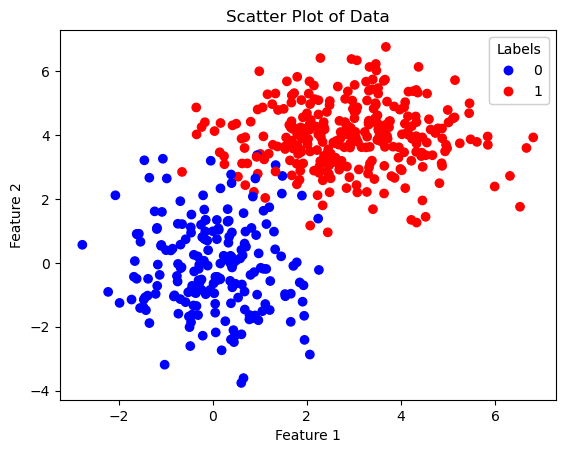

In [1]:
# TODO: Load and split dataset
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load('data.npy')

# Split the dataset into samples and labels
samples = data[:, :2]
labels = data[:, 2]

# Plot the data with a scatterplot
scatter = plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title='Labels', loc='upper right')
plt.gca().add_artist(legend1)

plt.show()

## Model



The function $\sigma$ is called the logistic *sigmoid function*:

\begin{align}
\sigma(a) = \cfrac{1}{1+\exp(-a)}\ .
\end{align}


###  Task 2
Implement a vectorized logistic sigmoid function, i.e. it takes a vector of x-coordinates X and returns a vector of their respective y values. Use it to plot the function between -10 and 10.

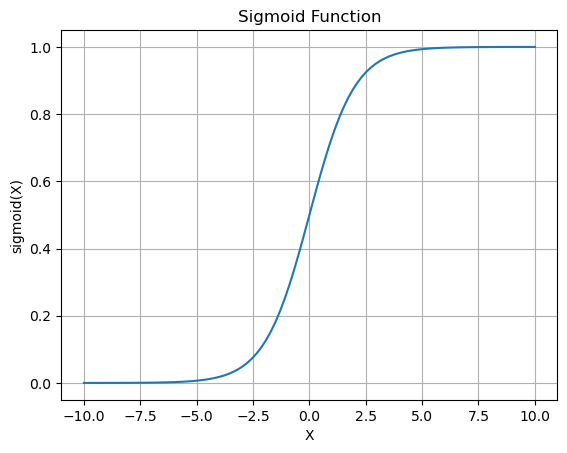

In [2]:
def sigmoid(X : np.ndarray) -> np.ndarray:
    '''
    Sigmoid function.
    
    @Params:
        X... array of x
        
    @Returns:
        array of sigmoid(x)
    '''
    # TODO: implement
    return 1 / (1 + np.exp(-X))

# TODO: Plot function from -10 to 10
X_value = np.linspace(-10, 10, 100)

# Evaluate the sigmoid function for the x-coordinates
Y_value = sigmoid(X_value)

# Plot the sigmoid function
plt.plot(X_value, Y_value)
plt.xlabel('X')
plt.ylabel('sigmoid(X)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

The goal in logistic regression is to find the parameter vector $\theta\in\mathbb{R}^n$, so that 

\begin{align}
p(y_i=1|x_i,\theta)&=\sigma(x_i^T\theta)\\
p(y_i=0|x_i,\theta)&=1-p(y_i=1|x_i,\theta)
\end{align}

fits our data and can be used to predict the label on unseen data (binary classification).


With an estimated $\theta$, a new feature $x\in\mathbb{R}^n$ is classified according to:

\begin{align}
\hat{y} = \begin{cases}
1&\text{, if }p(y=1|x,\theta)\geq 0.5\\
0&\text{, else}
\end{cases}.
\end{align}

Since $\sigma(0) =  1/(1+\exp(0)) = 0.5$. This is equivalent to 
\begin{align}
\hat{y} = \begin{cases}
1&\text{, if } x_i^T\theta \geq 0\\
0&\text{, else}
\end{cases}
\end{align}
 as noted in the lecture.

### Task 3
Prepare `X` so that the classification function for an estimated $\theta$ is [*affine*](https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function). Add this affine component at the **first column**.

In [3]:
# TODO: Prepare X1
X = np.column_stack((np.ones(samples.shape[0]), samples)).T

# Print the updated X matrix
m, n = X.shape
print(X)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 4.8777683  -1.1680935  -0.68944918 ... -1.7262826  -1.18388064
   3.33208779]
 [ 3.89871851 -0.05555429  1.92973945 ... -1.1499625   1.09354485
   6.13215341]]


### Task 4

Implement a `predict` function based on the above definition of probabilities.

Test your function with a randomly chosen $\theta$.

In [4]:
def predict(X : np.ndarray, theta: np.ndarray) -> np.ndarray:
    '''
    Predicts Y given X and theta.
    
    @Params:
        X... matrix with datapoints as rows (m x n)
        theta... parameter vector (n)
        
    @Returns:
        array of predictions (m)
    '''
    # TODO: implement
    return np.where(sigmoid(X.T @ theta) >= 0.5, 1, 0)

# TODO: test function
theta = np.random.randn(m, 1)
print(predict(X, theta))

[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


## Learning $\theta$

For a given $\theta$, we can calculate $p(y|x,\theta)$ and use this probability for classification.
To evaluate how well a learned $\theta$ can be used to classify our data, we define a *loss function*.
Here we want to use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) given as:

\begin{align}
L(\theta) = -\cfrac{1}{m}\sum_{i=1}^m y_i\log(p(y_i=1|x_i,\theta))+(1-y_i)\log(1-p(y_i=1|x_i,\theta))
\end{align}

Often it is convenient to have multiple metrics at hand. In classification problems, the *accuracy* of a
prediction is defined as the percentage of correctly classified features. In the case of logistic regression, this corresponds to 

\begin{align}
Acc(\theta) = \cfrac{1}{m}\sum_{i=1}^m y_i \hat{y_i} + (1-y_i)(1-\hat{y_i})
\end{align}
where $\hat{y_i}$ is the prediction for $x_i$.

As our model becomes better, we expect the accuracy to increase and the loss to decrease.  

### Task 5
Implement the binary cross entropy and the accuracy for logistic regression. 

Again, test your functions with a randomly chosen $\theta$.

In [5]:
def cross_entropy_loss(X : np.ndarray, Y : np.ndarray, theta : np.ndarray) -> float:
    '''
    Binary cross entropy loss.
    
    @Params:
        X... matrix with datapoints as rows (m x n)
        Y... array of true labels (n)
        theta... parameter vector (n)
        
    @Returns:
        binary cross entropy
    '''
    # TODO: implement

    # Compute predicted probabilities
    p = sigmoid(X.T @ theta)

    return -np.mean(Y * np.log(p) + (1 - Y) * np.log(1 - p))
    
    
def acc(X : np.ndarray, Y : np.ndarray, theta : np.ndarray) -> float:
    '''
    Accuracy.
    
    @Params:
        X... matrix with datapoints as rows (m x n)
        Y... array of true labels (n)
        theta... parameter vector (n)
        
    @Returns:
        binary cross entropy
    '''
    
    # TODO: implement

    # Compute predicted probabilities
    Y_hat = predict(X, theta)
    
    return np.mean(Y*Y_hat+(1-Y)*(1-Y_hat))

# TODO: test function
print(cross_entropy_loss(X, labels, theta))
print(acc(X, labels, theta))

1.5012941007457483
0.438


Given the loss function $L(\theta)$, we want to minimize this function with respect to the parameters $\theta$, that is we are looking for

\begin{align}
    \text{argmin}_\theta L(\theta)
\end{align}

However, since this is a highly nonlinear optimization problem, we use an iterative approach that starts with an initial estimate for $\theta$ and approaches the solution at each iteration step. 
The most simple approach is to take the gradient
$\nabla L(\theta)$ of $L(\theta)$ with respect to $\theta$ and walk into direction of the negative gradient. 
This method is called gradient-descent.

### Task 6

Find out $\nabla L(\theta) = \cfrac{d L}{d \theta}$ and implement this function.
The resulting function takes features $X$, labels $Y$ and $\theta$ as input and outputs a gradient $\nabla L(\theta)\in\mathbb{R}^n$.

Again, test your function with a randomly chosen $\theta$.

Solution:
\begin{align}
\cfrac{\partial L}{\partial \theta} =\cfrac{1}{m}\sum_{i=1}^m x_i (\sigma(x_i^T\theta)-y_i)
\end{align}

In [6]:
def cross_entropy_gradient(X : np.ndarray, Y : np.ndarray, theta : np.ndarray):
    '''
    Gradient of binary crossentropy. wrt theta.
    
    @Params:
        X... matrix with datapoints as rows (m x n)
        Y... array of true labels (n)
        theta... parameter vector (n)
        
    @Returns:
        gradient at point theta
    '''
    # TODO: implement
    
    return (X@(sigmoid(X.T@theta)-Y))/Y.shape[0]

# TODO: test function
print(cross_entropy_gradient(X, labels, theta))

[[-0.74586931  0.25413069  0.25413069 ...  0.25413069  0.25413069
  -0.74586931]
 [-1.72293399  0.03133011  0.03133011 ...  0.03133011  0.03133011
  -1.72293399]
 [-1.92993189  0.39821523  0.39821523 ...  0.39821523  0.39821523
  -1.92993189]]


### Task 7
Implement the fit function for the following Logistic Regression class:

 1. (randomly) choose initial $\hat{\theta}$
 2. update $\hat{\theta} \leftarrow \hat{\theta} -\eta\nabla L(\hat{\theta})$
 3. repeat 2. until a maximum number of iterations $\lambda$ (parameter `max_it`) is reached or the loss did not change more than $\varepsilon$ (parameter `eps`).
 
The hyperparameter $\eta$ is also called *learning rate* (parameter `lr`).

Additionaly track the losses and accuracies that occur during the iterations of gradient descend. 

Test your class (on the prepared data from above) and plot the accuracies and losses over the iterations.

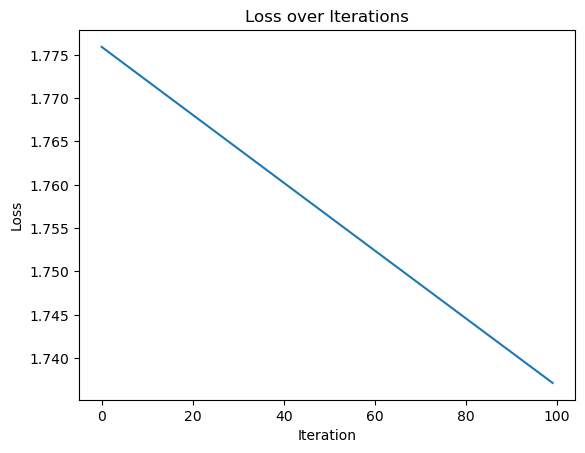

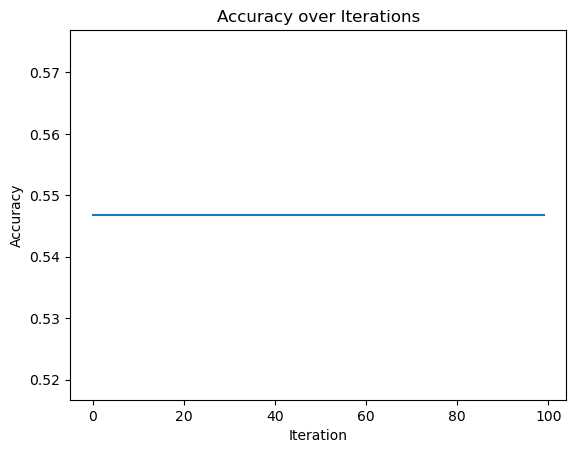

In [7]:
class LogReg():
    def __init__(self):
        '''
        Class for Logistic regression.
        '''
        self.theta = None # parameter vector
        self.accs = [] # accuracies
        self.losses = [] # losses


    def predict(self, X : np.ndarray) -> np.ndarray:
        '''
        Predicts Y given X and learned theta.

        @Params:
            X... matrix with datapoints as rows (m x n)

        @Returns:
            array of predictions (m)
        '''
        return predict(X, self.theta)
    
    
    def fit(self, X : np.ndarray, Y : np.ndarray, lr : float = 1e-2, max_it : int = 1000, eps : float = 1e-5) -> None:
        '''
        Gradient descend for binary crossentropy.

        @Params:
            X... matrix with datapoints as rows (m x n)
            Y... array of true labels (n)
            lr... learnrate, sets stepsize for descend
            max_it... maximum number of steps
            eps... abort criterium for early stopping (loss did not change more than this)

        '''
        
        # TODO: implement
        theta = np.random.randn(X.shape[0], 1)
        
        for i in range(max_it):
            
            theta_tmp = theta - lr * cross_entropy_gradient(X, Y, theta)
            diff = np.linalg.norm(cross_entropy_loss(X, Y, theta)-cross_entropy_loss(X, Y, theta_tmp))

            self.losses.append(cross_entropy_loss(X, Y, theta))
            self.accs.append(acc(X, Y, theta))

            if diff < eps:
                break

            theta = theta_tmp
            
# TODO: test class + plot losses/accuracies
logreg = LogReg()
logreg.fit(X, labels, lr = 1e-4, max_it=100, eps = 1e-5)

# Plot losses
plt.plot(logreg.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Plot accuracies
plt.plot(logreg.accs)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()


### Task 8

So far, we used the whole dataset for fitting the `LogReg` class.

- Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into train (75%) and testset (25%).
- Fit the Logistic Regression model on the trainset and calculate the final accuracies on the train and testset. 
- Experiment with the hyperparameters for fit, to get a good result.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.T, labels, test_size=0.25, random_state=42)

# TODO: apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# TODO: determine train and test accuracy

# Predict labels for train and test sets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracies for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9653333333333334
Test Accuracy: 0.992


## Visualization

Next we want to visualize our classifier. To to this, we want to visualize the *decision boundary* defined by $\hat{\theta}$.

The decision boundary is defined as 
$
\{x\in\mathbb{R}^n: p(y=1|x)=0.5\}
$
or as in the lecture:
$\{x\in \{1\} \times \mathbb{R}^n: x^T\hat{\theta}=0\}$


### Task 9

Implement a function `plot_dec_boundary` that visualizes the data and the regression line for 2 dimensional samples $X$ and an estimated $\hat{\theta}$.

Test this function with the $\hat{\theta}$ estimated in Task 8.

In [9]:
def plot_dec_boundary(X : np.ndarray, Y : np.ndarray, theta : np.ndarray):    
    '''
    Plots the decision boundary for 2D logistic regression task.
    
    @Params:
        X... matrix with datapoints as rows (m x 2)
        Y... array of true labels (m)
        theta... parameter vector (2)
    '''
    
    # TODO: plot data and decision boundary
    pass
    
# TODO: test function

### Task 10

Use the [implementation from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a logistic regressor.

Visualize the regression line that you obtain with scikit learn.

In [10]:
# TODO: estimate theta with scikit-learn

# TODO: plot regression line with data